In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

excel_name = '附件1 监测点A空气质量预报基础数据1.xlsx'#附件1 监测点A空气质量预报基础数据.xlsx
na_values = '—'

def cp(value, value_name):
    print('==============%s=============='%value_name)
    print(value)    
    print('==============%s=============='%value_name)

data1 = pd.read_excel(excel_name, sheet_name=0,na_values=na_values)
data1.head(3)

,模型运行日期,预测时间,地点,近地2米温度（℃）,地表温度（K）,比湿（kg/kg）,湿度（%）,近地10米风速（m/s）,近地10米风向（°）,雨量（mm）,...,潜热通量（W/m²）,长波辐射（W/m²）,短波辐射（W/m²）,地面太阳能辐射（W/m²）,SO2小时平均浓度(μg/m³),NO2小时平均浓度(μg/m³),PM10小时平均浓度(μg/m³),PM2.5小时平均浓度(μg/m³),O3小时平均浓度(μg/m³),CO小时平均浓度(mg/m³)
0,2020-07-23,2020-07-23 00:00:00,监测点A,29.8890,304.016,0.018870,66.7409,4.16382,162.577,0.0,...,0.94818,428.278,0.0,0.0,2.40151,20.9208,8.17336,5.27729,8.78723,0.124491
1,2020-07-23,2020-07-23 01:00:00,监测点A,29.8736,303.739,0.017556,62.1551,4.65267,171.978,0.0,...,1.14987,427.531,0.0,0.0,1.44834,14.8144,6.49054,4.33106,12.74530,0.109056
2,2020-07-23,2020-07-23 02:00:00,监测点A,29.6471,303.419,0.017874,64.1760,4.10031,172.013,0.0,...,1.01616,427.428,0.0,0.0,1.27161,13.9154,6.86679,4.40045,12.22960,0.105957


In [147]:
data2 = pd.read_excel(excel_name, sheet_name=1, na_values=na_values)
data2.head(3)

,监测时间,地点,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3监测浓度(μg/m³),CO监测浓度(mg/m³),温度(℃),湿度(%),气压(MBar),风速(m/s),风向(°)
0,2019-04-16 00:00:00,监测点A,5.0,75.0,61.0,38.0,1.0,1.0,21.1,89.0,1013.0,1.2,346.5
1,2019-04-16 01:00:00,监测点A,5.0,64.0,60.0,41.0,25.0,0.8,20.4,92.0,1012.4,1.1,18.0
2,2019-04-16 02:00:00,监测点A,4.0,60.0,36.0,40.0,25.0,0.8,20.0,93.0,1011.3,1.1,65.9


In [148]:
data3 = pd.read_excel(excel_name, sheet_name=2, na_values=na_values)
data3.head(3)

,监测日期,地点,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
0,2019-04-16,监测点A,5.0,56.0,36.0,31.0,103.0,0.8
1,2019-04-17,监测点A,9.0,63.0,67.0,53.0,206.0,1.1
2,2019-04-18,监测点A,6.0,37.0,31.0,25.0,83.0,0.6


In [149]:
start_time = '2019-04-16 00:00:00'
end_time = '2021-07-12 00:00:00'
time_list = pd.date_range(start_time, end_time, freq='D')
data3 = data3.iloc[:-3,:]
print('应有天数',len(time_list))
print('实际天数', len(data3))
data3

应有天数 819
实际天数 819


,监测日期,地点,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
0,2019-04-16,监测点A,5.0,56.0,36.0,31.0,103.0,0.8
1,2019-04-17,监测点A,9.0,63.0,67.0,53.0,206.0,1.1
2,2019-04-18,监测点A,6.0,37.0,31.0,25.0,83.0,0.6
3,2019-04-19,监测点A,5.0,50.0,23.0,15.0,71.0,0.6
4,2019-04-20,监测点A,6.0,68.0,33.0,26.0,32.0,0.7
...,...,...,...,...,...,...,...,...
814,2021-07-08,监测点A,5.0,15.0,18.0,3.0,64.0,0.4
815,2021-07-09,监测点A,7.0,17.0,28.0,12.0,146.0,0.4
816,2021-07-10,监测点A,6.0,13.0,20.0,5.0,81.0,0.4
817,2021-07-11,监测点A,6.0,11.0,20.0,3.0,63.0,0.3


# 预处理

In [150]:
data3.isnull().sum()

监测日期                       0
地点                         0
SO2监测浓度(μg/m³)             4
NO2监测浓度(μg/m³)             6
PM10监测浓度(μg/m³)           11
PM2.5监测浓度(μg/m³)           5
O3最大八小时滑动平均监测浓度(μg/m³)     7
CO监测浓度(mg/m³)              6
dtype: int64

In [151]:
data_temp = data3.iloc[:,2:].interpolate()
data_temp.isnull().sum()

SO2监测浓度(μg/m³)            0
NO2监测浓度(μg/m³)            0
PM10监测浓度(μg/m³)           0
PM2.5监测浓度(μg/m³)          0
O3最大八小时滑动平均监测浓度(μg/m³)    0
CO监测浓度(mg/m³)             0
dtype: int64

In [152]:
data_temp.describe()

,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,7.008547,32.875458,44.073871,24.219170,98.542125,0.715568
std,3.065990,18.737483,23.198945,22.217843,51.869257,0.206167
min,1.000000,4.000000,5.000000,2.000000,2.000000,0.300000
25%,5.000000,20.000000,27.000000,11.000000,61.000000,0.600000
50%,6.000000,29.000000,38.000000,21.000000,87.000000,0.700000
75%,9.000000,41.500000,56.000000,32.500000,128.000000,0.800000
max,20.000000,132.000000,143.000000,465.000000,296.000000,1.500000


# 正式开始

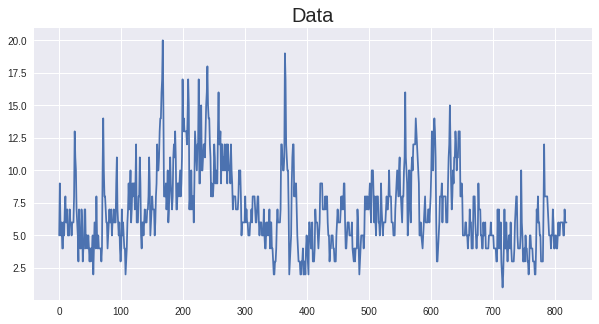

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

predict_dim = 3 
time_step = 10
target_id = 0

target = data_temp.iloc[:,target_id].values
#plot
plt.figure(figsize=(10,5))
plt.plot(target)
plt.title("Data",fontsize='20') #添加标题
plt.show()
print('\n')


# 归一化

In [154]:
#minmaxscaler
mm_x= MinMaxScaler()
mm_y= MinMaxScaler()
data = mm_x.fit_transform(data_temp)
label = mm_y.fit_transform(np.reshape(target, (-1, 1)))
data[:2], label[:2]

(array([[0.21052632, 0.40625   , 0.22463768, 0.06263499, 0.34353741,
         0.41666667],
        [0.42105263, 0.4609375 , 0.44927536, 0.11015119, 0.69387755,
         0.66666667]]),
 array([[0.21052632],
        [0.42105263]]))

# 划分训练集测试集

In [155]:
x = []
y = []
for i, _ in enumerate(data):
    if len(data[i+time_step: i+time_step+predict_dim])!= predict_dim:
        break
    x.append(data[i: i+time_step,:])
    y.append(data[i+time_step: i+time_step+predict_dim,target_id])
x = np.array(x)
y = np.array(y)
print('x.shape, y.shape', x.shape, y.shape)
x_train,x_test,y_train,y_test= x[:-1, :],x[-1: , :],y[:-1, :],y[-1: ,:]
print('x_train.shape,x_test.shape,y_train.shape,y_test.shape', x_train.shape,x_test.shape,y_train.shape,y_test.shape)

x.shape, y.shape (807, 10, 6) (807, 3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape (806, 10, 6) (1, 10, 6) (806, 3) (1, 3)


# LSTM

In [156]:
import os
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = '6'
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"
tensorflow_version = tf.__version__
gpu_available = tf.test.is_gpu_available()
print("tensorflow_version", tensorflow_version, "GPU available", gpu_available)

tensorflow_version 2.2.0 GPU available True


2021-10-18 02:00:07.717941: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:40:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-10-18 02:00:07.718318: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-10-18 02:00:07.718402: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-10-18 02:00:07.718475: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021-10-18 02:00:07.718538: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2021-10-18 02:00:07.718598: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolv

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 10, 6)]           0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 16)                1472      
_________________________________________________________________
dense_56 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_57 (Dense)             (None, 3)                 51        
Total params: 1,795
Trainable params: 1,795
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6/6 - 1s - loss: 0.2669 - val_loss: 0.1580
Epoch 2/50
6/6 - 0s - loss: 0.2255 - val_loss: 0.1361
Epoch 3/50
6/6 - 0s - loss: 0.1949 - val_loss: 0.1277
Epoch 4/50
6/6 - 0s - loss: 0.1836 - val_loss: 0.1310
Epoch 5/50
6/6 - 0s - loss: 0.1849 - v

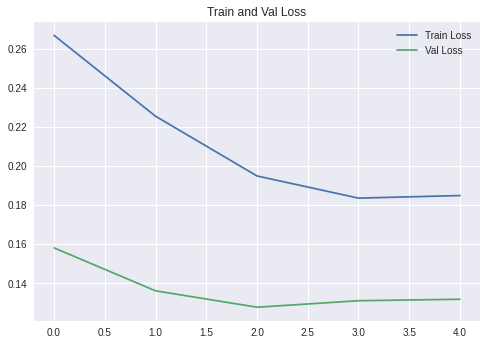

In [157]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense, Embedding, Dropout, LSTM, MaxPooling1D, Lambda, Concatenate, \
    Multiply, RepeatVector, Flatten, Activation, Permute, Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

epoch = 50
batch_size = 128
best_model_file = 'best_model.h5'

def lstm_model():
    #建立模型
    inputs=Input(shape=x_train.shape[-2:])
    lstm = LSTM(16, input_shape=x_train.shape[-2:], return_sequences=False)(inputs)
    dense = Dense(16, activation='relu')(lstm)
    outputs = Dense(predict_dim, activation='relu')(dense)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile('adam','mae')
    model.summary()
    return model  

myModel = lstm_model()
#save best model
es = EarlyStopping(monitor='val_loss', patience=2)
cp = ModelCheckpoint(filepath=best_model_file, monitor='val_loss', save_best_only=True)
history = myModel.fit(x=x_train,
                    y=y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=2,callbacks=[es, cp],
                    validation_split=0.1)
#iter plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(loss))
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()


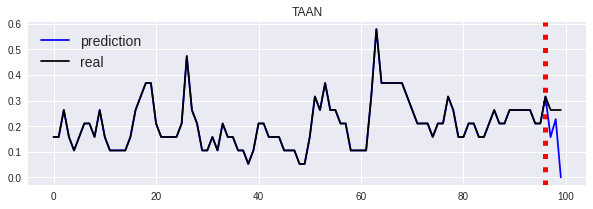

测试集上的MAE/RMSE/MAPE
0.13477539075048345
0.16499896813584353
51.21464848518371


In [158]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

show_num = 100#画图

def mape(y_true, y_pred):
    """
    参数:
    y_true -- 测试集目标真实值
    y_pred -- 测试集目标预测值
    
    返回:
    mape -- MAPE 评价指标
    """
    
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape


myModel.load_weights(best_model_file)
y_test_predict = myModel.predict(x_test)
y_test_predict = y_test_predict[0,:]
train_show = data[-show_num: -predict_dim,target_id]
test = data[-predict_dim:,target_id]
pred=np.hstack((train_show,y_test_predict))
real=np.hstack((train_show,test)) 
plt.figure(figsize=(10, 3))
plt.axvline(len(train_show)-1, linestyle="dotted", linewidth=5, color='r')
plt.plot(pred,label="prediction", color="b")
plt.plot(real,label="real", color="k")
plt.legend(loc="upper left", fontsize = 14)
plt.title('TAAN')
plt.show()
#评价指标
print('测试集上的MAE/RMSE/MAPE')
print(mean_absolute_error(test, y_test_predict))
print(np.sqrt(mean_squared_error(test, y_test_predict)))
print(mape(test, y_test_predict))

# CNN

Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 10, 6)]           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 8, 16)             304       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 1, 16)             0         
_________________________________________________________________
lambda_5 (Lambda)            (None, 16)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_59 (Dense)             (None, 3)                 51        
Total params: 627
Trainable params: 627
Non-trainable params: 0
____________________________________________________________

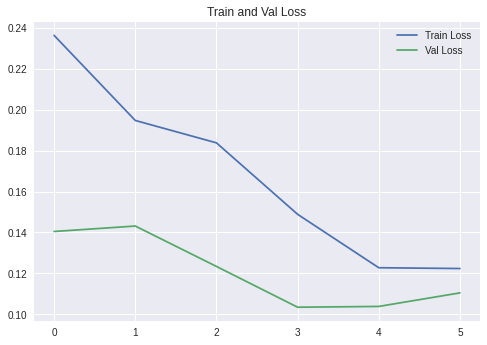

In [159]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense, Embedding, Dropout, LSTM, MaxPooling1D, Lambda, Concatenate, \
    Multiply, RepeatVector, Flatten, Activation, Permute, Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K

epoch = 50
batch_size = 128
best_model_file = 'best_model.h5'

def cnn_model():
    #建立模型
    inputs=Input(shape=x_train.shape[-2:])
    
    gc1 = Conv1D(filters=16, kernel_size=3, activation="tanh", use_bias=True)(inputs)
    gc1m = MaxPooling1D(pool_size=x_train.shape[-2]-3+1)(gc1)
    gc = Lambda(lambda x:K.squeeze(x, axis=1))(gc1m)
    dense = Dense(16, activation='relu')(gc)
    outputs = Dense(predict_dim, activation='relu')(dense)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile('adam','mae')
    model.summary()
    return model  

myModel = cnn_model()
#save best model
es = EarlyStopping(monitor='val_loss', patience=2)
cp = ModelCheckpoint(filepath=best_model_file, monitor='val_loss', save_best_only=True)
history = myModel.fit(x=x_train,
                    y=y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=2,callbacks=[es, cp],
                    validation_split=0.1)
#iter plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(loss))
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()


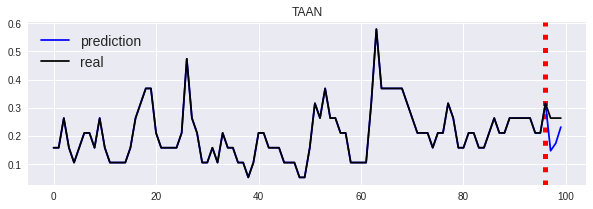

测试集上的MAE/RMSE/MAPE
0.07917908383043187
0.08662340112324235
30.088051855564114


In [160]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

show_num = 100#画图

def mape(y_true, y_pred):
    """
    参数:
    y_true -- 测试集目标真实值
    y_pred -- 测试集目标预测值
    
    返回:
    mape -- MAPE 评价指标
    """
    
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape


myModel.load_weights(best_model_file)
y_test_predict = myModel.predict(x_test)
y_test_predict = y_test_predict[0,:]
train_show = data[-show_num: -predict_dim,target_id]
test = data[-predict_dim:,target_id]
pred=np.hstack((train_show,y_test_predict))
real=np.hstack((train_show,test)) 
plt.figure(figsize=(10, 3))
plt.axvline(len(train_show)-1, linestyle="dotted", linewidth=5, color='r')
plt.plot(pred,label="prediction", color="b")
plt.plot(real,label="real", color="k")
plt.legend(loc="upper left", fontsize = 14)
plt.title('TAAN')
plt.show()
#评价指标
print('测试集上的MAE/RMSE/MAPE')
print(mean_absolute_error(test, y_test_predict))
print(np.sqrt(mean_squared_error(test, y_test_predict)))
print(mape(test, y_test_predict))

# BP

Model: "model_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 10, 6)]           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 60)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 64)                3904      
_________________________________________________________________
dense_65 (Dense)             (None, 3)                 195       
Total params: 4,099
Trainable params: 4,099
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6/6 - 0s - loss: 0.2100 - val_loss: 0.1442
Epoch 2/50
6/6 - 0s - loss: 0.1985 - val_loss: 0.1346
Epoch 3/50
6/6 - 0s - loss: 0.1887 - val_loss: 0.1249
Epoch 4/50
6/6 - 0s - loss: 0.1466 - val_loss: 0.0933
Epoch 5/50
6/6 - 0s - loss: 0.1284 - v

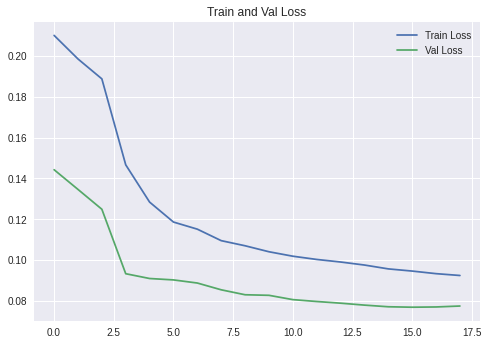

In [166]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense, Embedding, Dropout, LSTM, MaxPooling1D, Lambda, Concatenate, \
    Multiply, RepeatVector, Flatten, Activation, Permute, Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K

epoch = 50
batch_size = 128
best_model_file = 'best_model.h5'

def bp_model():
    #建立模型
    inputs=Input(shape=x_train.shape[-2:])
    flat = Flatten()(inputs)
    dense = Dense(64, activation='relu')(flat)
    outputs = Dense(predict_dim, activation='relu')(dense)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile('adam','mae')
    model.summary()
    return model  

myModel = bp_model()
#save best model
es = EarlyStopping(monitor='val_loss', patience=2)
cp = ModelCheckpoint(filepath=best_model_file, monitor='val_loss', save_best_only=True)
history = myModel.fit(x=x_train,
                    y=y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=2,callbacks=[es, cp],
                    validation_split=0.1)
#iter plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(loss))
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()


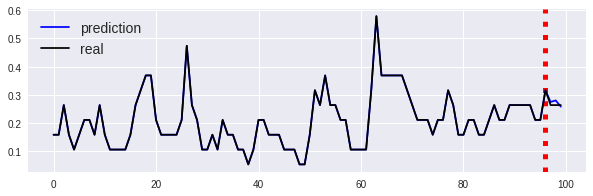

测试集上的MAE/RMSE/MAPE
0.011065923331076644
0.011933840640804952
4.205050865809124


In [167]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

show_num = 100#画图

def mape(y_true, y_pred):
    """
    参数:
    y_true -- 测试集目标真实值
    y_pred -- 测试集目标预测值
    
    返回:
    mape -- MAPE 评价指标
    """
    
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape


myModel.load_weights(best_model_file)
y_test_predict = myModel.predict(x_test)
y_test_predict = y_test_predict[0,:]
train_show = data[-show_num: -predict_dim,target_id]
test = data[-predict_dim:,target_id]
pred=np.hstack((train_show,y_test_predict))
real=np.hstack((train_show,test)) 
plt.figure(figsize=(10, 3))
plt.axvline(len(train_show)-1, linestyle="dotted", linewidth=5, color='r')
plt.plot(pred,label="prediction", color="b")
plt.plot(real,label="real", color="k")
plt.legend(loc="upper left", fontsize = 14)
#plt.title('TAAN')
plt.show()
#评价指标
print('测试集上的MAE/RMSE/MAPE')
print(mean_absolute_error(test, y_test_predict))
print(np.sqrt(mean_squared_error(test, y_test_predict)))
print(mape(test, y_test_predict))